In [1]:
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
size=128 #taille des images
nbDir=52 #nombre de fichiers de fleurs

Etape 1: Nettoyage des images

In [3]:
data=[]
label=[]


FlowerPath='../echantillon'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if  file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (size,size))
            data.append(im)
                    
        else: 
            continue

data_arr = np.array(data)
label_arr = np.array(label)
y = LabelEncoder().fit_transform(label_arr)
y = to_categorical(y,nbDir) #mettre le nb de fichiers de fleurs
X = data_arr/255



Etape 2: Séparation des données, 25% dans test et le reste dans train

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [5]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [6]:
model = Sequential()
model.add(Conv2D(filters = size/2, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = size/4, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = size/2, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = size, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(size, activation='relu'))
model.add(Dense(size/2, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(nbDir, activation = "softmax"))


In [7]:
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [8]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=20

checkpoint_path = "modele52/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),   
                              verbose = 1,
                              callbacks=[cp_callback])

C:\Users\Hugo\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\Hugo\AppData\Local\Temp/ipykernel_14804/4043535554.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/20
168/168 [==============================] - ETA: 0s - loss: 3.7244 - accuracy: 0.0905
Epoch 00001: saving model to modele\cp.ckpt
168/168 [==============================] - 388s 2s/step - loss: 3.7244 - accuracy: 0.0905 - val_loss: 3.4565 - val_accuracy: 0.1608
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 3.5231 - accuracy: 0.1409
Epoch 00002: saving model to modele\cp.ckpt
168/168 [==============================] - 373s 2s/step - loss: 3.5231 - accuracy: 0.1409 - val_loss: 3.2284 - val_accuracy: 0.2362
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 3.4087 - accuracy: 0.1703
Epoch 00003: saving model to modele\cp.ckpt
168/168 [==============================] - 367s 2s/step - loss: 3.4087 - accuracy: 0.1703 - val_loss: 3.0947 - val_accuracy: 0.2585
Epoch 4/20
168/168 [==============================] - ETA: 0s - loss: 3.3048 - accuracy: 0.1900
Epoch 00004: saving model to modele\cp.ckpt
168/168 [==============================] - 4

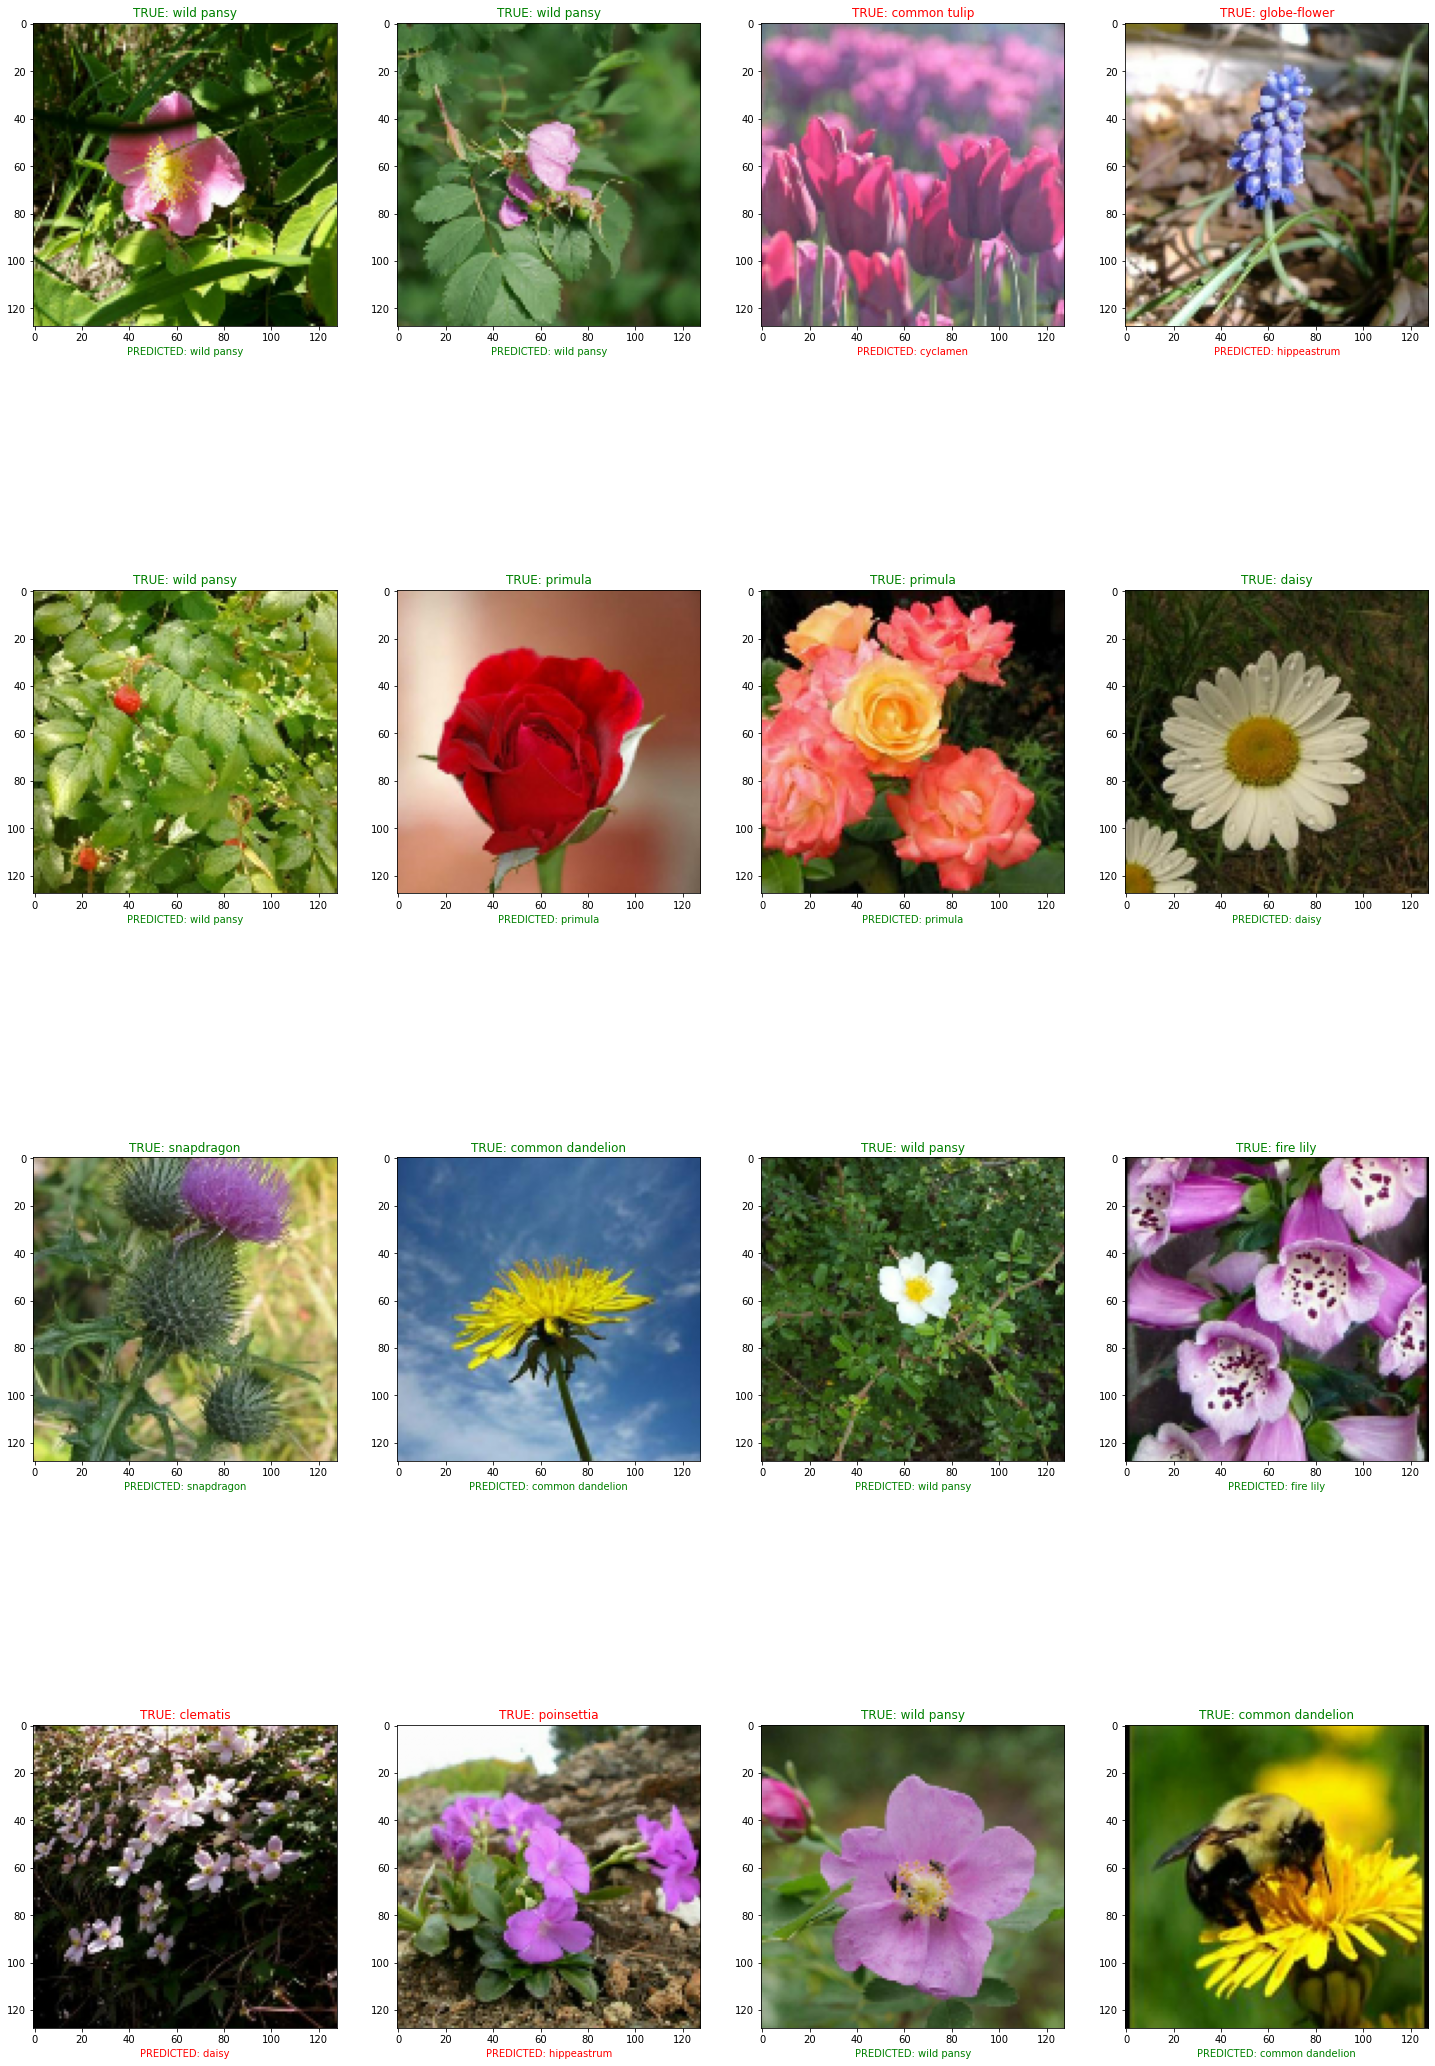

In [9]:
categories = np.sort(os.listdir(FlowerPath))
fig, ax = plt.subplots(4,4, figsize=(25, 40))

for i in range(4):
    for j in range(4):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(size, size, 3), cmap='gray')

In [10]:
model.save('modele52/my_model')
del model

INFO:tensorflow:Assets written to: modele/my_model\assets
